# Problématique : Prédire si un prêt sera accordé ou non en fonction de caractéristiques telles que le revenu, l’état matrimonial, le montant demandé, etc.

## Chargement des données

Nous utilisons le dataset `Loan Prediction Dataset` disponible sur Kaggle.

# Visualisons les données 

Les données d'entrainement 

In [11]:
import pandas as pd

# Chargement des données
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
print(train_data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

Les données de test 

In [12]:
# Chargement des données
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
print(test_data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

##  Exploration visuelle et statistique des données

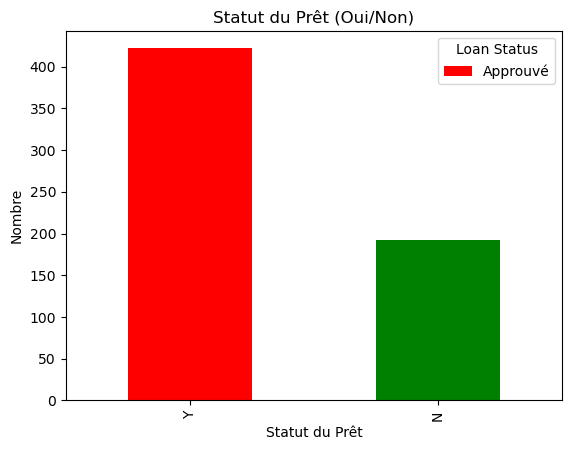

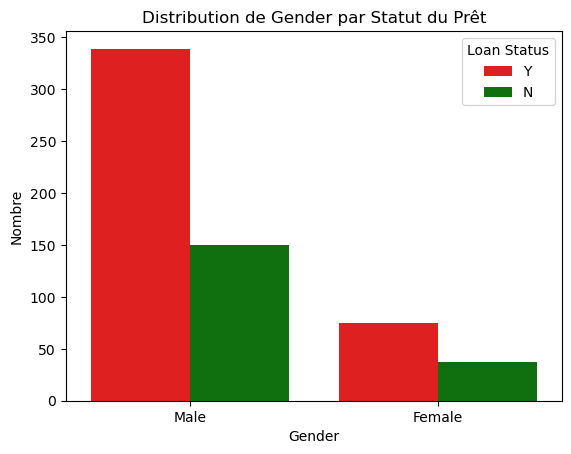

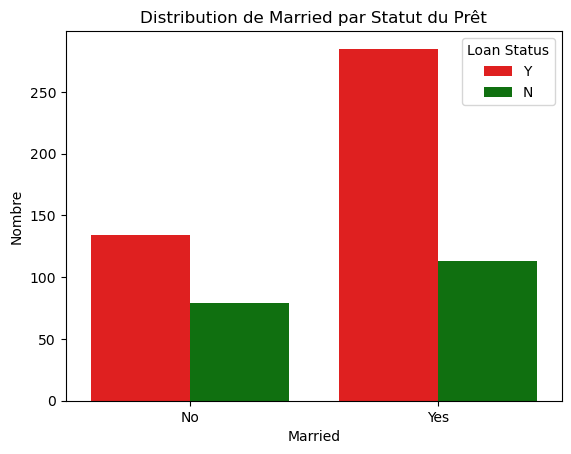

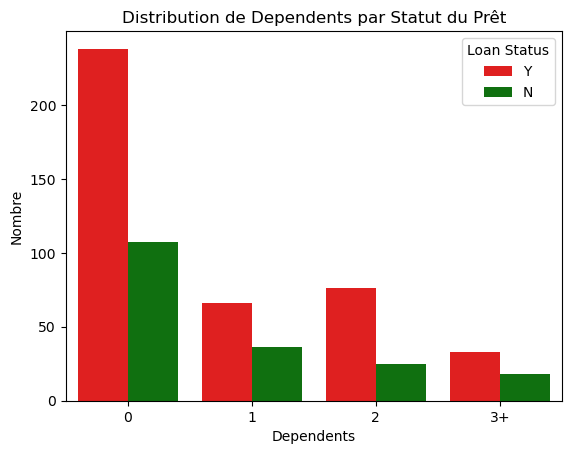

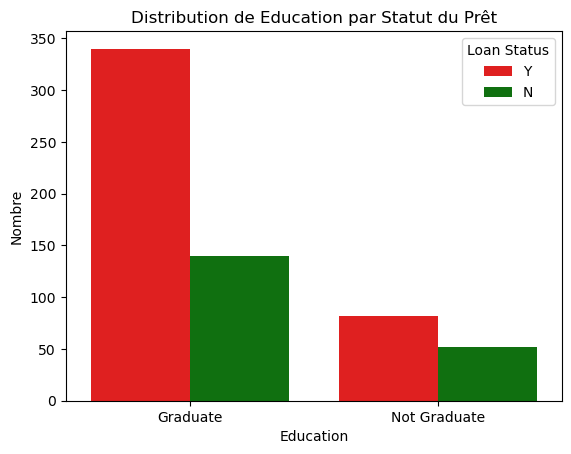

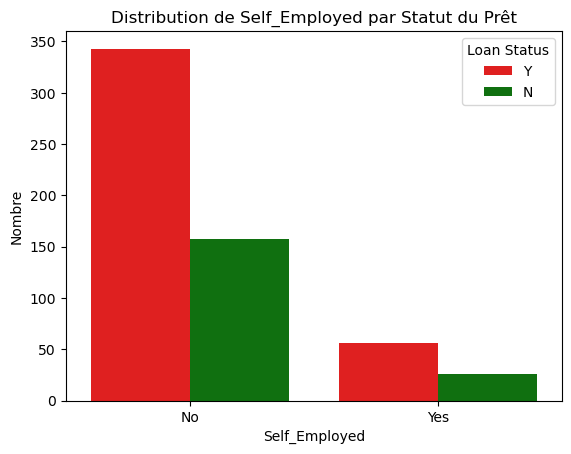

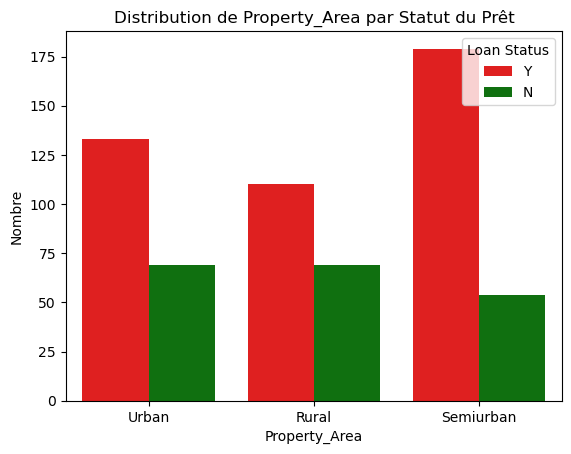

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot Loan_Status Oui/Non
train_data['Loan_Status'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Statut du Prêt (Oui/Non)')
plt.xlabel('Statut du Prêt')
plt.ylabel('Nombre')
plt.legend(title='Loan Status', loc='upper right', labels=['Approuvé', 'Non Approuvé'])
plt.show()

# Graphique catégoriel pour chaque variable catégorielle, séparé par le statut du prêt
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for feature in categorical_features:
    sns.countplot(data=train_data, x=feature, hue='Loan_Status', palette=['red', 'green'])
    plt.title(f'Distribution de {feature} par Statut du Prêt')
    plt.xlabel(feature)
    plt.ylabel('Nombre')
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()


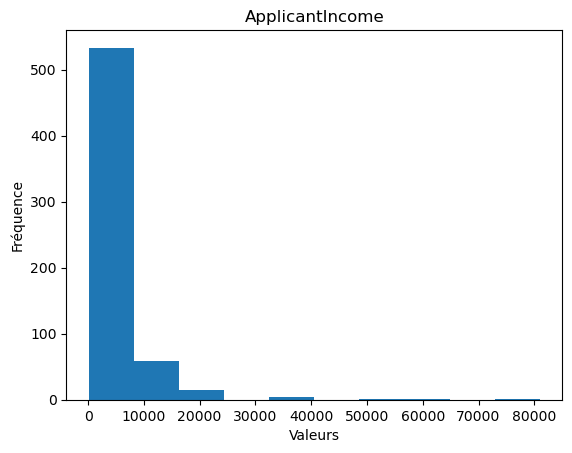

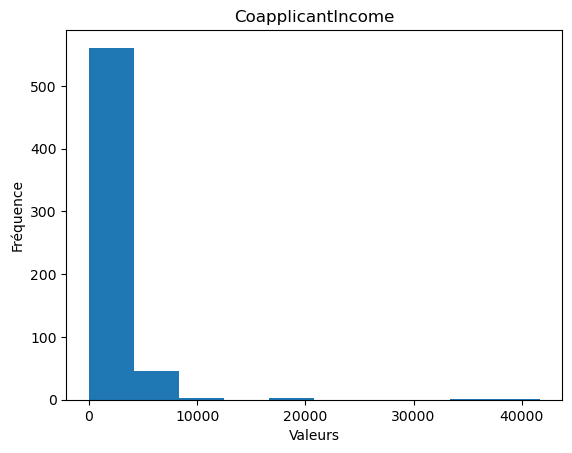

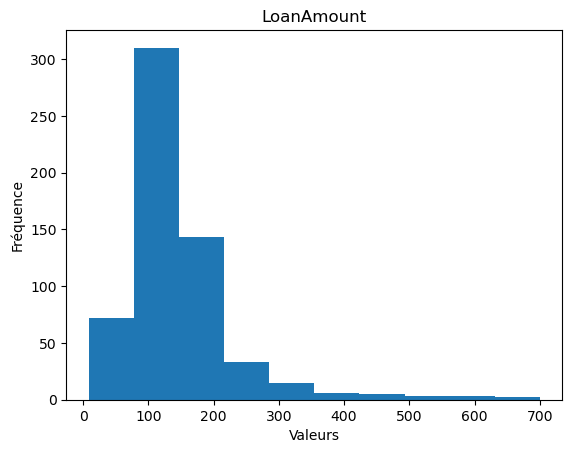

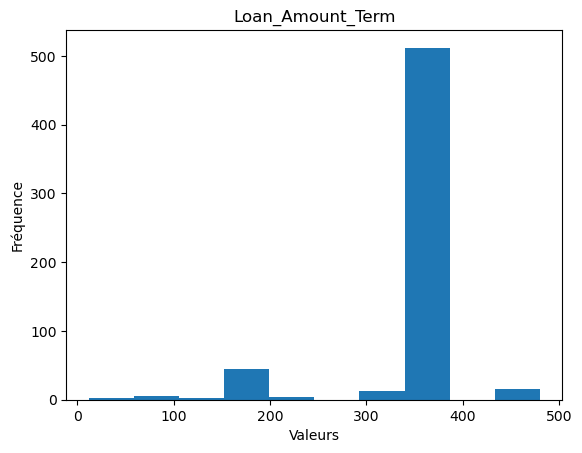

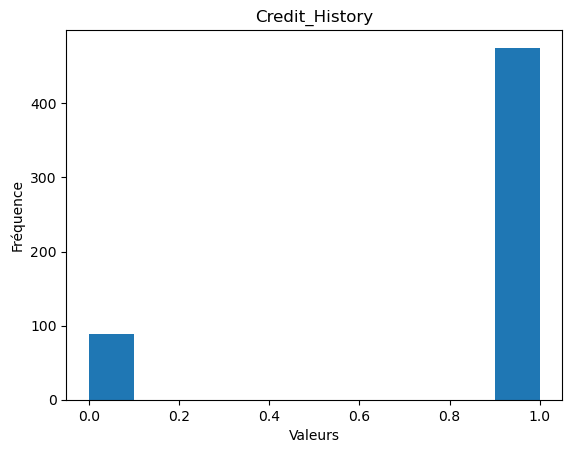

In [14]:
import matplotlib.pyplot as plt

  # Sélectionner uniquement les colonnes numériques
loan_num = train_data.select_dtypes(include=[np.number])

for i in loan_num.columns:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquence')
    plt.show()

## Préparation des données

### Nettoyage des données 

In [15]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

print(train_data.info())

# Remplacer les valeurs manquantes
train_data.fillna({
   'Gender': train_data['Gender'].mode()[0],
    'Married': train_data['Married'].mode()[0],
    'Dependents': train_data['Dependents'].mode()[0],
    'Self_Employed': train_data['Self_Employed'].mode()[0],
    'LoanAmount': train_data['LoanAmount'].mean(),
    'Loan_Amount_Term': train_data['Loan_Amount_Term'].mean(),
    'Credit_History': train_data['Credit_History'].mode()[0]
}, inplace=True)

# Suppression de la colonne Loan_ID
train_data.drop('Loan_ID', axis=1, inplace=True)  

# Encodage des variables catégoriques selon les valeurs spécifiques
train_data.replace({
    'Gender': {'Male': 1, 'Female': 2},
    'Married': {'Yes': 1, 'No': 2},
    'Education': {'Graduate': 1, 'Not Graduate': 2},
    'Self_Employed': {'Yes': 1, 'No': 2},
    'Property_Area': {'Urban': 3, 'Semiurban': 2, 'Rural': 1},
    'Loan_Status': {'Y': 1, 'N': 0},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3}
}, inplace=True)

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #

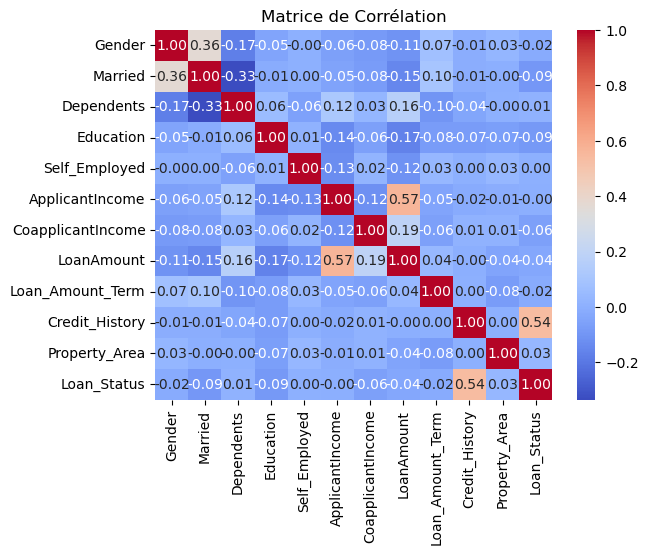

In [17]:
# Visualiser la corrélation entre variables
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

##  Division des données :
Diviser le dataset en ensembles d'entraînement et de test (70% / 30%).

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Séparer les variables prédictives (X) et la cible (y)
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Développer des modèles d'apprentissage

## Random Forest

Le modèle Random Forest est utilisé pour prédire l'approbation des prêts.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

### Évaluation du modèle Random Forest

Calcul des métriques de performance et visualisation des résultats.

Random Forest - Accuracy: 0.7621621621621621, Precision: 0.7676056338028169, Recall: 0.9083333333333333, AUC: 0.7815384615384615


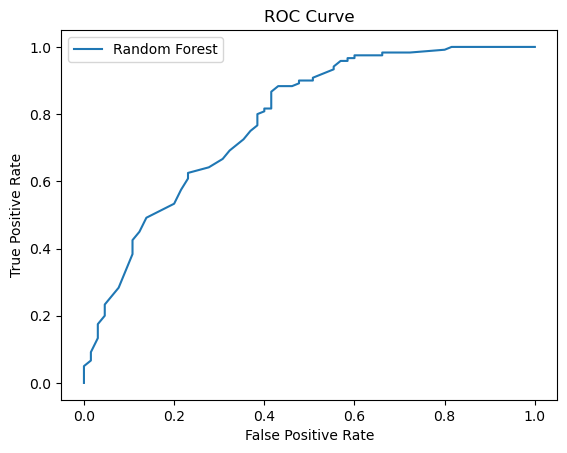

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Évaluation Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, AUC: {auc_rf}")

# Courbe ROC 
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##  Régression logistique

Nous entraînons le modèle sur l'ensemble d'entraînement et utilisons la validation croisée.

In [21]:
from sklearn.linear_model import LogisticRegression

# Modèle de régression logistique
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Prédictions
y_pred_lr = lr_model.predict(X_test)

### Évaluation du modèle Régression logistique

Calcul des métriques de performance et visualisation des résultats.

Logistic Regression - Accuracy: 0.7837837837837838, Precision: 0.7564102564102564, Recall: 0.9833333333333333, AUC: 0.7551282051282051


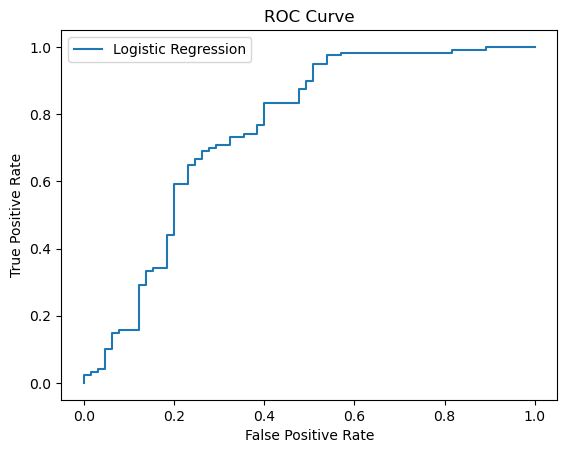

In [22]:
# Évaluation Régression Logistique
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print(f"Logistic Regression - Accuracy: {accuracy_lr}, Precision: {precision_lr}, Recall: {recall_lr}, AUC: {auc_lr}")

# Courbe ROC 
fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##  Arbre de décision 

Arbre de Décision - Rapport de classification
              precision    recall  f1-score   support

           0       0.81      0.34      0.48        65
           1       0.73      0.96      0.83       120

    accuracy                           0.74       185
   macro avg       0.77      0.65      0.65       185
weighted avg       0.76      0.74      0.70       185



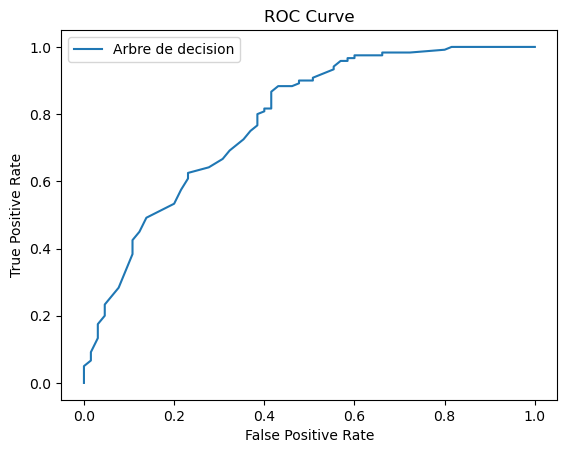

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modèle arbre de décision
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_dt = dt_model.predict(X_test)
print("Arbre de Décision - Rapport de classification")
print(classification_report(y_test, y_pred_dt))

# Courbe ROC 
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='Arbre de decision')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##  K-Nearest Neighbors (KNN)

/Users/yasmine/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN - Rapport de classification
              precision    recall  f1-score   support

           0       0.26      0.12      0.17        65
           1       0.63      0.81      0.71       120

    accuracy                           0.57       185
   macro avg       0.44      0.47      0.44       185
weighted avg       0.50      0.57      0.52       185



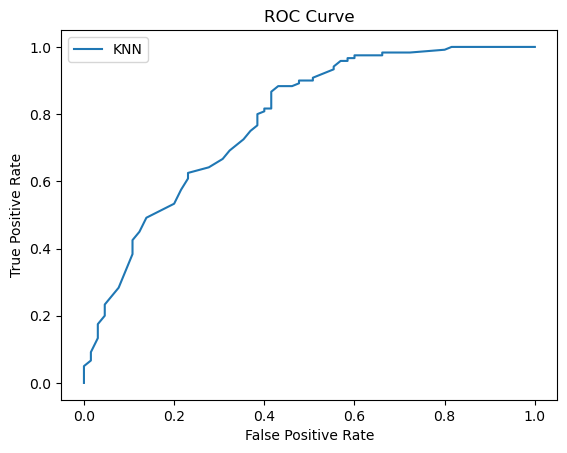

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_knn = knn_model.predict(X_test)
print("KNN - Rapport de classification")
print(classification_report(y_test, y_pred_knn))

# Courbe ROC 
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Clustering pour segmentation

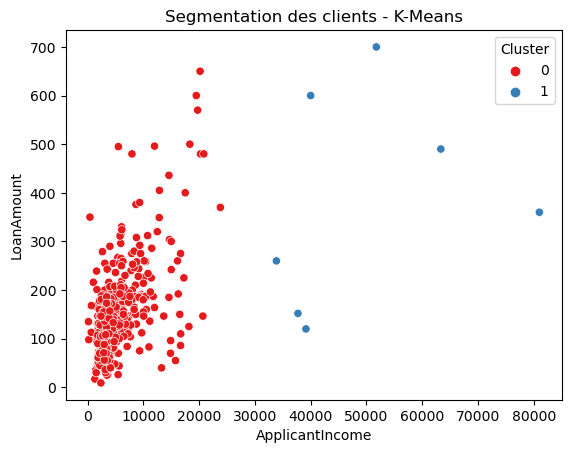

In [25]:
from sklearn.cluster import KMeans

# Modèle K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(X)

# Visualisation des clusters
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Cluster', data=train_data, palette='Set1')
plt.title('Segmentation des clients - K-Means')
plt.show()

## SVM

SVM - Accuracy: 0.6504065040650406
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/Users/yasmine/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yasmine/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yasmine/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


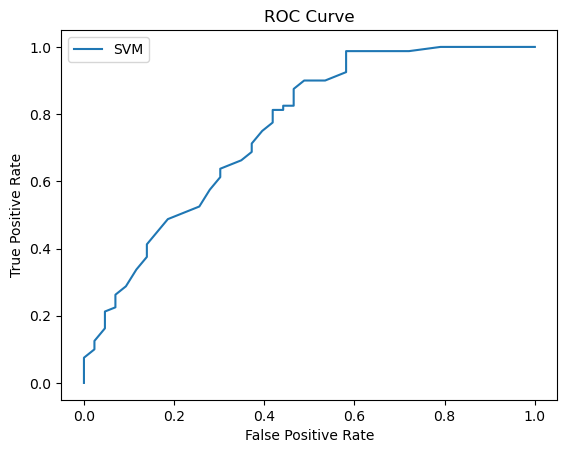

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Utilisation de l'ensemble des données d'entraînement
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM avec noyau RBF
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_full, y_train_full)
y_pred_svm = svm_model.predict(X_test)

# Évaluation
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Courbe ROC 
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## AdaBoost

AdaBoost - Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123



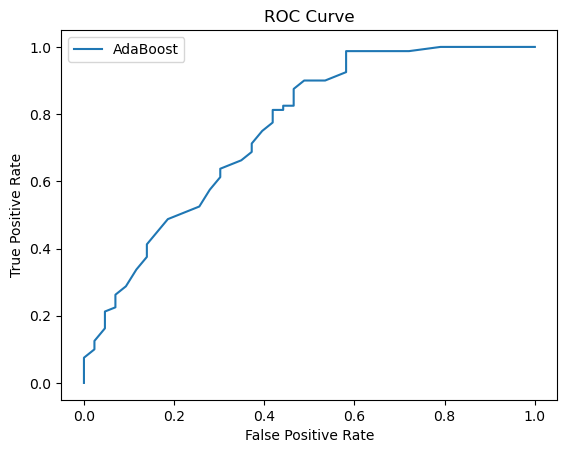

In [27]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

# Évaluation
print("AdaBoost - Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

# Courbe ROC 
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Comparaison des résultats 

In [28]:
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Calculer les scores
results = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Afficher les résultats
print("Comparaison des modèles :")
for model, score in results.items():
    print(f"{model}: {score:.2f}")

Comparaison des modèles :
Random Forest: 0.75
Logistic Regression: 0.79
Decision Tree: 0.74
KNN: 0.59
SVM: 0.65


/Users/yasmine/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
